# Zad 1.
Narysuj dane iris data wybierając dwie pierwsze współrzędne.

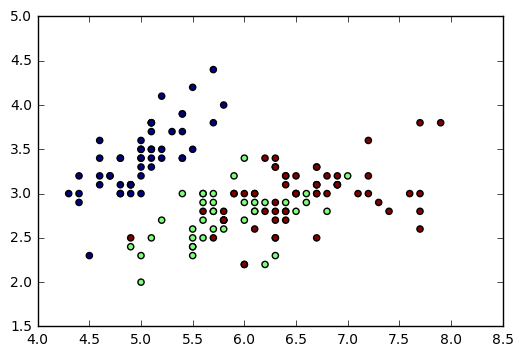

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
_ = plt.scatter(X[:, 0], X[:, 1], c=y)

# Zad 2.
Wykonaj klastrowanie algorytmem k-means na danych iris z różnymi klastrami oraz różnymi inicjalizacjami (losowa, k-means++).

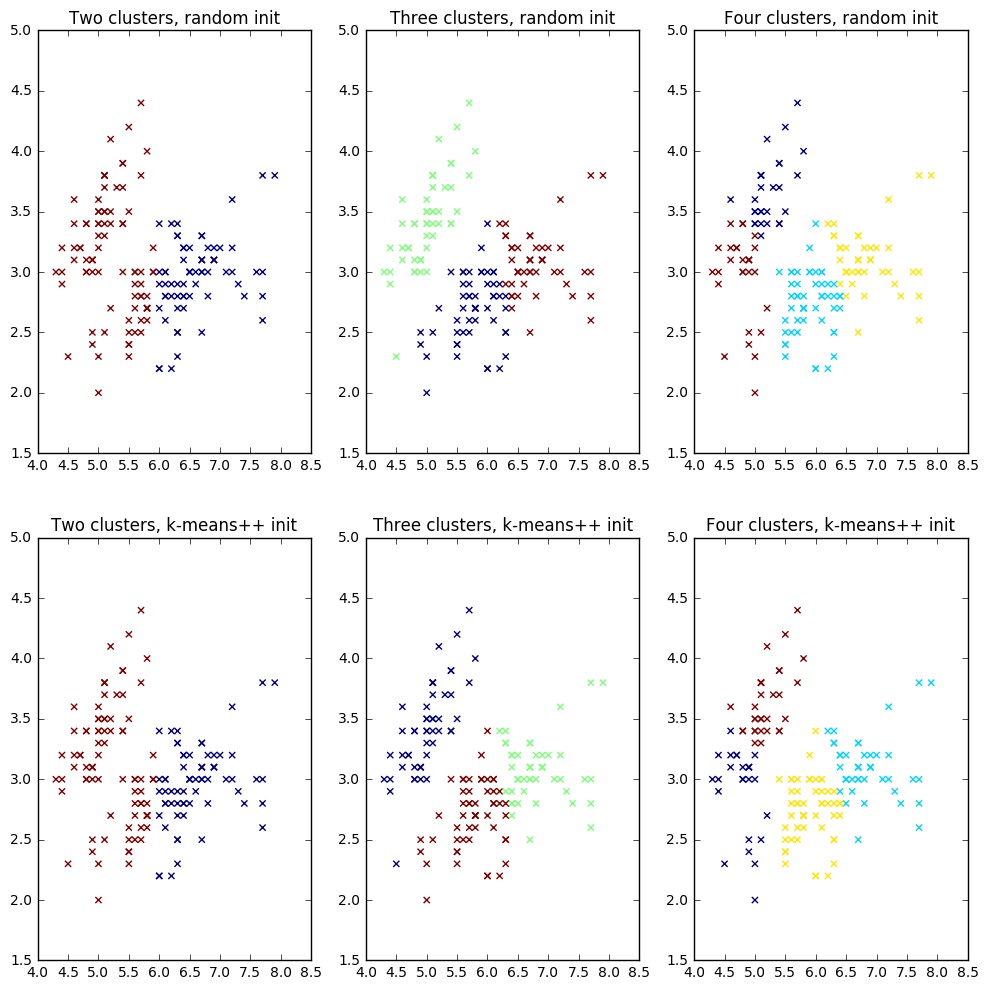

In [44]:
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 12))

y_pred = KMeans(n_clusters=2, init='random').fit_predict(X)
plt.subplot(231)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x')
plt.title("Two clusters, random init")

y_pred = KMeans(n_clusters=3, init='random').fit_predict(X)
plt.subplot(232)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x')
plt.title("Three clusters, random init")

y_pred = KMeans(n_clusters=4, init='random').fit_predict(X)
plt.subplot(233)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x')
plt.title("Four clusters, random init")

y_pred = KMeans(n_clusters=2, init='k-means++').fit_predict(X)
plt.subplot(234)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x')
plt.title("Two clusters, k-means++ init")

y_pred = KMeans(n_clusters=3, init='k-means++').fit_predict(X)
plt.subplot(235)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x')
plt.title("Three clusters, k-means++ init")

y_pred = KMeans(n_clusters=4, init='k-means++').fit_predict(X)
plt.subplot(236)
plt.scatter(X[:, 0], X[:, 1], marker='x', c=y_pred)
_ = plt.title("Four clusters, k-means++ init")

# Zad 3.
Wykonaj klastrowanie k-means na danych iris z ilością grup (k=1,2,3,4,5,6) oraz narysuj wykres jak zmienia się suma kwadratów odległości od centrów grup (Sum of distances of samples to their closest cluster center) w zależności od ilości grup.

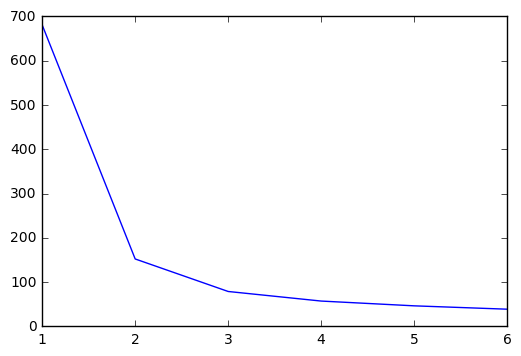

In [47]:
def inertia(k, X):
    return KMeans(n_clusters=k).fit(X).inertia_

v_inertia = np.vectorize(inertia, excluded=['X'])
K = np.linspace(1, 6, 6, dtype=int)
_ = plt.plot(K, v_inertia(K, X=iris.data))

# Zad 4.
Wykonaj klastrowanie k-means na danych iris z ilością grup (k=1,2,3,4,5,6) oraz oceń ich jakość za pomocą miary Jaccard index.

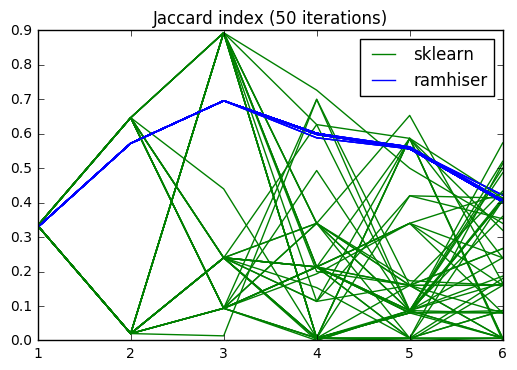

In [48]:
import itertools
from sklearn.metrics import jaccard_similarity_score

# based on https://gist.github.com/ramhiser/c990481c387058f3cce7
def jaccard_(labels1, labels2):
    n11 = n10 = n01 = 0
    n = labels1.shape[0]
    for i, j in itertools.combinations(range(n), 2):
        comembership1 = labels1[i] == labels1[j]
        comembership2 = labels2[i] == labels2[j]
        if comembership1 and comembership2:
            n11 += 1
        elif comembership1 and not comembership2:
            n10 += 1
        elif not comembership1 and comembership2:
            n01 += 1
    return float(n11) / (n11 + n10 + n01)

def jaccard(k, X, y):
    y_pred = KMeans(n_clusters=k).fit_predict(X)
    return jaccard_similarity_score(y, y_pred)

def jaccard2(k, X, y):
    y_pred = KMeans(n_clusters=k).fit_predict(X)
    return jaccard_(y, y_pred)

v_jaccard = np.vectorize(jaccard, excluded=['X', 'y'])
v_jaccard2 = np.vectorize(jaccard2, excluded=['X', 'y'])

for i in range(50):
    plt.plot(K, v_jaccard(K, X=iris.data, y=iris.target), c='g')
    plt.plot(K, v_jaccard2(K, X=iris.data, y=iris.target), c='b')
plt.title("Jaccard index (50 iterations)")
_ = plt.legend(["sklearn", "ramhiser"])

# sklearn just checks if indices are the same, hence the meaningless graphs

# Zad 5.
Wykonaj klastrowanie k-means na danych uzyskanych z obrazu (segmentacja). Każdy piksel reprezentuj jako punkt w $R^5$ gdzie pierwsze 3 współrzędne to odpowiednio kolory RGB a ostatnie dwie to położenie piksela na obrazku. Narysuj obrazek po segmentacji kolorując piksele w grupach jednym kolorem.

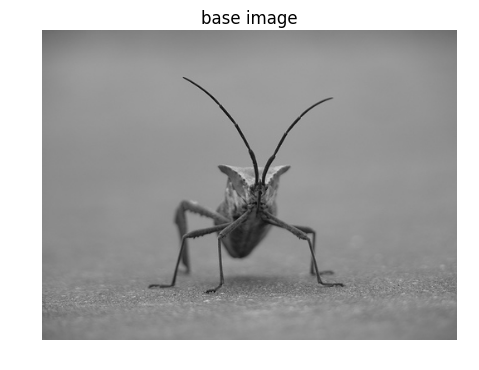

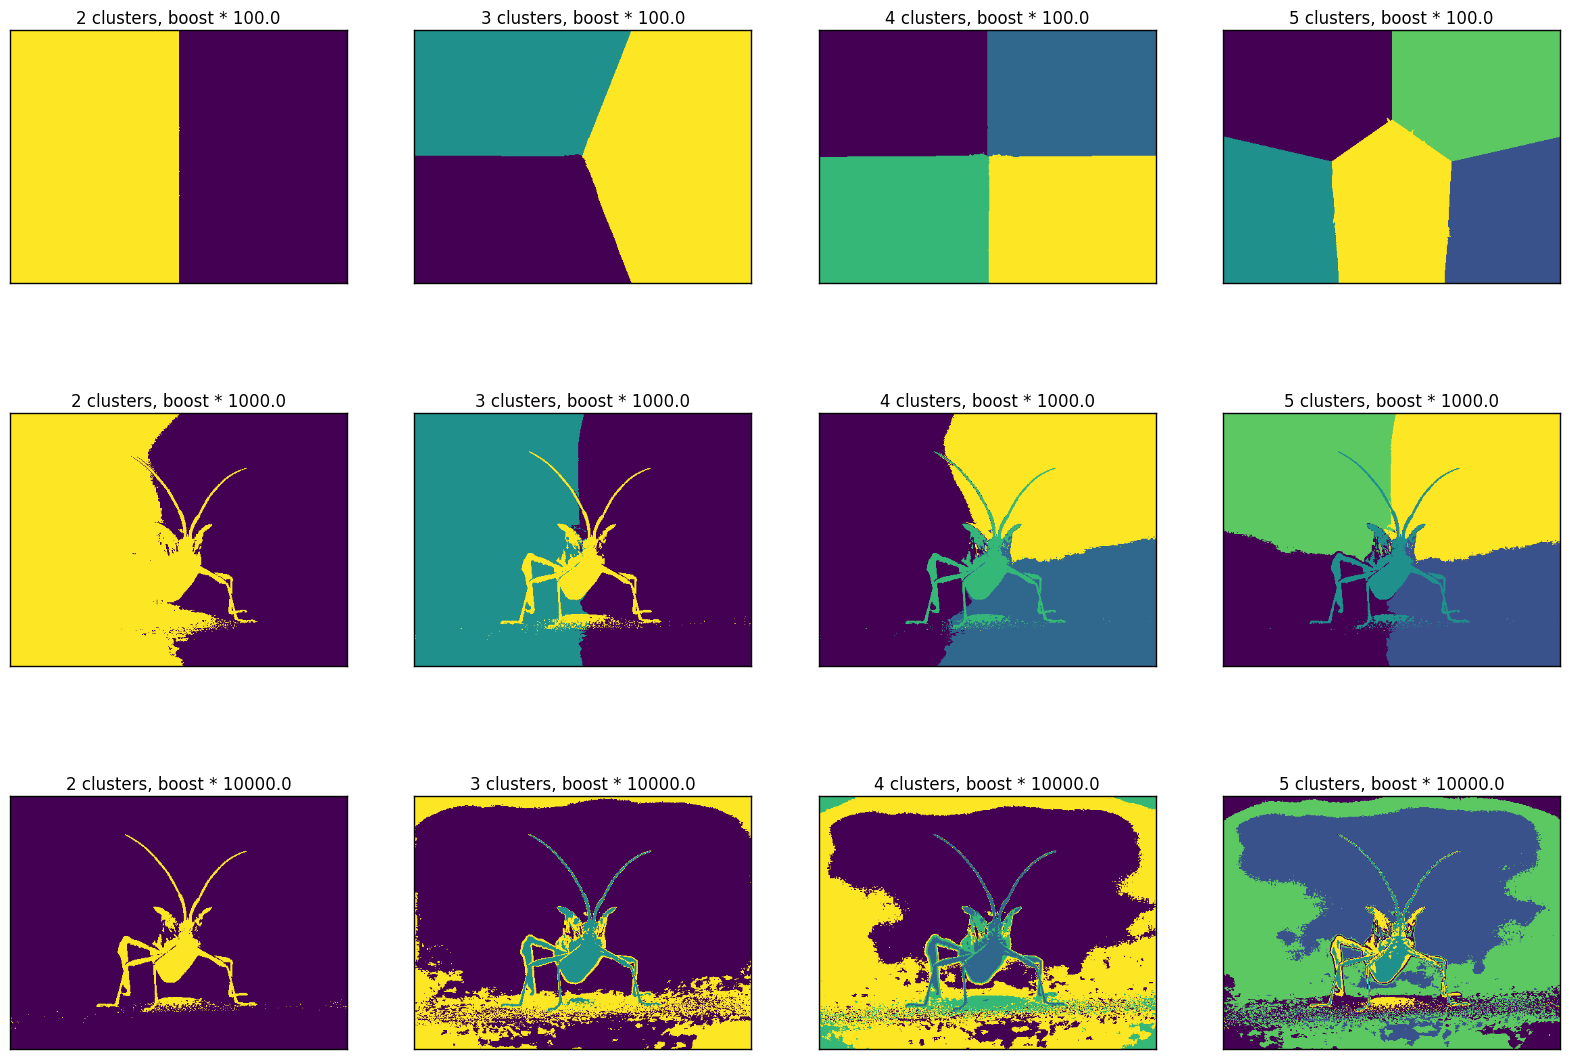

In [127]:
import matplotlib.image as mpimg

img = mpimg.imread("files/stinkbug.png")
plt.imshow(img)
plt.axis('off')
plt.title("base image")
plt.show()

fig = plt.figure(figsize=(20, 14))
min_clust = 2
max_clust = 6
boost = 3
for k in range(min_clust, max_clust):
    t = 100
    for e in range(boost):
        dim_x, dim_y, _ = img.shape
        # need to boost intensity values, so they're at least same order of magnitude as coordinates
        img_2d = np.array([np.append(img[i][j] * t, [i, j]) for i in range(dim_x) for j in range(dim_y)])
        t *= 10
        kmeans = KMeans(n_clusters=k).fit(img_2d)
        seg_img = [[kmeans.labels_[dim_y * i + j] / k for j in range(dim_y)] for i in range(dim_x)]
        fig.add_subplot(boost, max_clust - min_clust, (max_clust - min_clust) * e + k - min_clust + 1, xticks=[], yticks=[])
        plt.imshow(seg_img, cmap=plt.cm.viridis)
        plt.title(str(k) + " clusters, boost * " + str(t / 10))
plt.show()

# Zad 5.
Ściągnij bazę twarzy fetch_olivetti_faces i wyświetl kilka twarzy.

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.

faces.keys() = dict_keys(['DESCR', 'images', 'target', 'data'])
faces.images.shape = (400, 64, 64)
faces.data.shape = (400, 4096)
faces.target.shap = (400,)


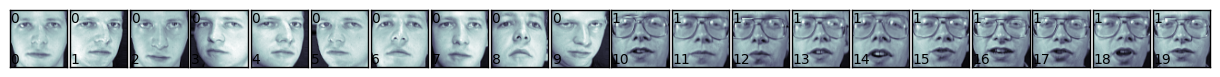

In [16]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

print("faces.keys() =", faces.keys())
print("faces.images.shape =", faces.images.shape)
print("faces.data.shape =", faces.data.shape)
print("faces.target.shape =", faces.target.shape)

# The data is normalized.
# print(np.max(faces.data))
# print(np.min(faces.data))
# print(np.mean(faces.data))

def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(1, top_n, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)

        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
    plt.show()

print_faces(faces.images, faces.target, 20)

# Zad 6.
Wykonaj klastrowanie k-means na danych z poprzedniego zadania z ilością grup (k=1,2,3,4,5,6) oraz oceń ich jakość za pomocą miary Jaccard index.

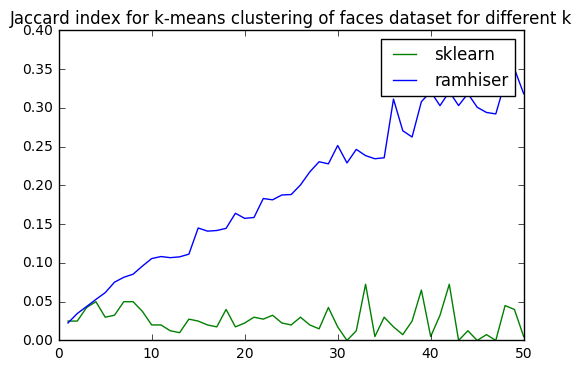

In [53]:
K = np.linspace(1, 50, 50, dtype=int)
plt.plot(K, v_jaccard(K, X=faces.data, y=faces.target), c='g')
plt.plot(K, v_jaccard2(K, X=faces.data, y=faces.target), c='b')
plt.title("Jaccard index for k-means clustering of faces dataset for different k")
_ = plt.legend(["sklearn", "ramhiser"])

# Zad 7.
Ściągnij bazę pisanych cyfr handwritten digits data i wyświetl kilka z nich.

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

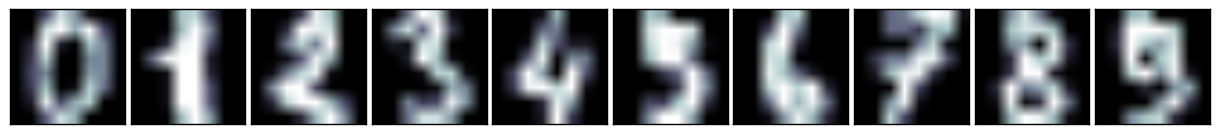

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

print("digits.keys() =", digits.keys())
print("digits.images.shape =", digits.images.shape)
print("digits.data.shape =", digits.data.shape)
print("digits.target.shape =", digits.target.shape)

def print_digits(images, target, top_n):
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        p = fig.add_subplot(1, top_n, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
    plt.show()

print_digits(digits.images, digits.target, 10)

# Zad 8.
Wykonaj klastrowanie k-means na danych z poprzedniego zadania z ilością grup (k=1,2,3,4,5,6) oraz oceń ich jakość za pomocą miary Jaccard index.

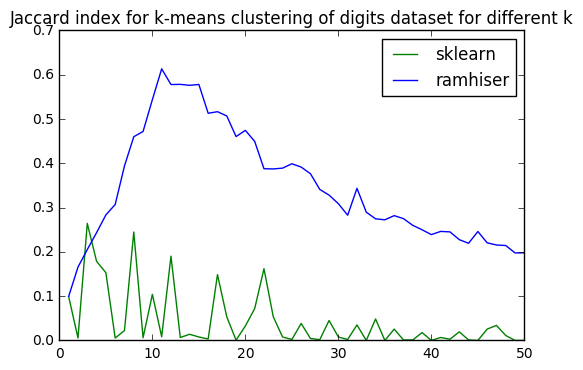

In [54]:
plt.plot(K, v_jaccard(K, X=digits.data, y=digits.target), c='g')
plt.plot(K, v_jaccard2(K, X=digits.data, y=digits.target), c='b')
plt.title("Jaccard index for k-means clustering of digits dataset for different k")
_ = plt.legend(["sklearn", "ramhiser"])

# Zad 9.
Narysuj jedną poziomicę rozkładu normalnego 2d. Policz pole ograniczone tą poziomicą za pomocą całkowania numerycznego.

area: 3.14168823478


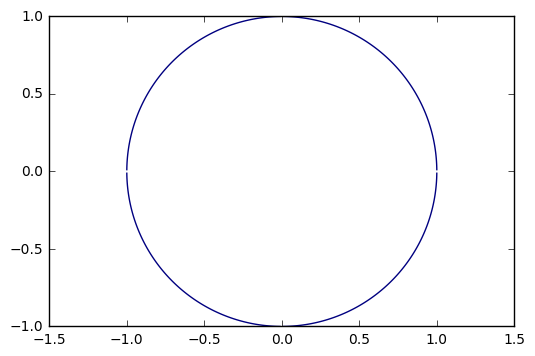

area: 2.42994345697


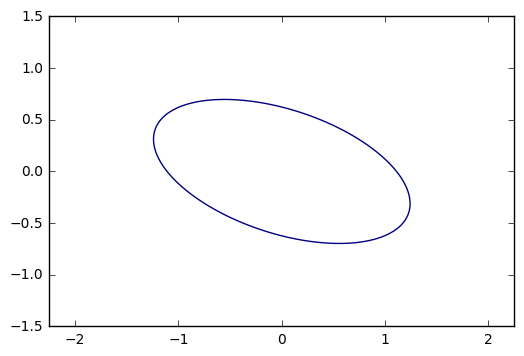

In [118]:
import matplotlib.mlab as mlab

def integrate_iso_area(mean, cov, level, x_min, x_max, y_min, y_max, grid_size):
    patch_area = (x_max - x_min) / (grid_size - 1) * (y_max - y_min) / (grid_size - 1)
    xs = np.linspace(x_min, x_max, grid_size)
    ys = np.linspace(y_min, y_max, grid_size)
    xx, yy = np.meshgrid(xs, ys)
    zz = mlab.bivariate_normal(xx, yy, 
                      np.sqrt(cov[0, 0]), np.sqrt(cov[1, 1]),
                      mean[0], mean[1], cov[1, 0])
    area = np.sum(np.sum(np.sum(zz > level))) * patch_area
    print("area:", area)
    plt.axis('equal')
    plt.contour(xx, yy, zz, [level])
    plt.show()

mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])
grid_size = 1000
x_min, x_max = -1, 1
y_min, y_max = -1, 1
level = 0.09653 # chosen so that level set of N([0, 0], id) gives a circle of radius 1, i.e. area should be pi

integrate_iso_area(mean, cov, level, x_min, x_max, y_min, y_max, grid_size)

mean = np.array([0, 0])
cov = np.array([[ 0.6744121 , -0.16938146], [-0.16938146,  0.21243464]])
grid_size = 1000
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
level = 0.15

integrate_iso_area(mean, cov, level, x_min, x_max, y_min, y_max, grid_size)